In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

In [3]:
Todo = pd.read_csv(r'/home/alejandro/Documents/Octavo/Intermedio/Dif_electrones/datos_dif_electrones.csv')
Todo.head()

,Unnamed: 0,U(kV),U(V),Incertidumbre,D1[mm],D2[mm],D1[m],D2[m],Promedio D1,Incertidumbre.1,Promedio D2,Incertidumbre.2,U^-1/2,Incertidumbre.3,lambda_bragg_D1,Error %,lambda_bragg_D2,Error %.1,lambda_broglie
0,NaN,3.2,3200.0,100.0,27.90,49.75,0.02790,0.04975,0.02968,0.00004,0.051350,0.000035,0.0177,0.0003,2.330505e-11,7.37,2.308270e-11,6.34,2.170628e-11
1,NaN,3.2,3200.0,100.0,31.45,52.95,0.03145,0.05295,NaN,NaN,NaN,NaN,0.0177,0.0003,NaN,NaN,NaN,NaN,NaN
2,NaN,3.4,3400.0,100.0,26.80,47.55,0.02680,0.04755,0.02843,0.00004,0.050075,0.000035,0.0171,0.0003,2.233163e-11,6.05,2.252407e-11,6.96,2.105818e-11
3,NaN,3.4,3400.0,100.0,30.05,52.60,0.03005,0.05260,NaN,NaN,NaN,NaN,0.0171,0.0003,NaN,NaN,NaN,NaN,NaN
4,NaN,3.6,3600.0,100.0,25.70,46.55,0.02570,0.04655,0.02745,0.00004,0.048525,0.000035,0.0167,0.0002,2.157162e-11,5.41,2.184353e-11,6.74,2.046487e-11


In [4]:
data = pd.DataFrame(Todo, columns=['U^-1/2','Incertidumbre.3', 'Promedio D1', 'Incertidumbre.1','Promedio D2','Incertidumbre.2'])

In [5]:
data.head()

,U^-1/2,Incertidumbre.3,Promedio D1,Incertidumbre.1,Promedio D2,Incertidumbre.2
0,0.0177,0.0003,0.02968,0.00004,0.051350,0.000035
1,0.0177,0.0003,NaN,NaN,NaN,NaN
2,0.0171,0.0003,0.02843,0.00004,0.050075,0.000035
3,0.0171,0.0003,NaN,NaN,NaN,NaN
4,0.0167,0.0002,0.02745,0.00004,0.048525,0.000035


In [6]:
U=[0]
IncU=[0]
D1=[0]
IncD1=[0]
D2=[0]
IncD2=[0]
for i in range(14):
    if i%2 == 0:
        U.append(data.iloc[i,0])
        IncU.append(data.iloc[i,1])
        D1.append(data.iloc[i,2])
        IncD1.append(data.iloc[i,3])
        D2.append(data.iloc[i,4])        
        IncD2.append(data.iloc[i,5])

In [8]:
pearson1, pvalue1 = stats.pearsonr(U,D1)
param1 = np.polyfit(U,D1,1)
param2 = np.polyfit(U,D2,1)
pearson2, pvalue2 = stats.pearsonr(U,D2)
print(pearson1,pearson2)
print(param1,param2)

0.9997355102628858 0.999526741163027
[1.6669925e+00 3.0356872e-05] [ 2.88976784e+00 -1.66691771e-04]


Text(0.5, 0, 'U[$1/V^{1/2}$]')

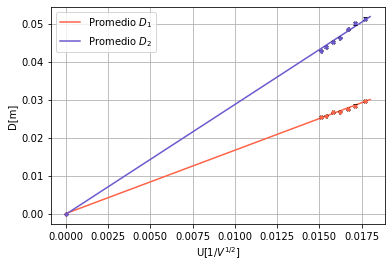

In [22]:
x = np.linspace(0,0.018,100)
y1 = param1[1] + param1[0]*x 
y2 = param2[1]+param2[0]*x
plt.plot(x,y1,c='Tomato',label=r'Promedio $D_1$')
plt.plot(x,y2,c='SlateBlue',label=r'Promedio $D_2$')
plt.grid()
plt.errorbar(U,D1,IncU,IncD1,fmt='o',color='Tomato',capsize=2,ecolor='k',markersize=3)
plt.errorbar(U,D2,IncU,IncD2,fmt='o',color='SlateBlue',capsize=2,ecolor='k',markersize=3)
plt.legend()
plt.ylabel('D[m]')
plt.xlabel(r'U[$1/V^{1/2}$]')

0.9886322690913569 0.996363012815942
[1.57315618e+00 1.56288503e-03] [ 3.40502983 -0.00858191]
